In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from array import array
import os
import sys
import ROOT
from Plot_func import Plot_prof_InRot
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
import sys 
import os
sys.path.append(os.path.abspath("/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/fastMCKalman/MC/"))
from fastSimulation import *

Welcome to JupyROOT 6.26/06


# Reading the files

In [2]:
folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/"
Recotype = "FullRecoInteraction"
Interaction = True
ParamType = "InRot"
Particletype = "_muon"
ParamStType = ""
if(ParamType=="InRot") : ParamStType = "NoRot"

sample = "Rangetest_"
inputData = folder+Recotype+"/fastParticle.list"
ROOT.initTreeFast(inputData)
tree = ROOT.treeFast
treeSeed = ROOT.treeSeed


Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root


## Resolution and bias as function of variables

### Length

In [6]:
Var = "fLengthInRot"
VarName = "Length (cm)"
legend = ["GArSoft Resolution","NewKF Resolution"]
param = ["paramStNoRot","fParamInRot[0]"]
savesigma = folder+Recotype+"/Plots/"+sample+ParamType+"RespVsLength.png"
savemean = folder+Recotype+"/Plots/"+sample+ParamType+"BiaspVsLength.png"
HistoXY = ["12,350,650","30,-0.5,0.5"]
HistoVarX = "80,350,650"
rangeuserYsigma = [0.01,0.04]
rangeuserYmean = [-0.02,0.02]

if(Interaction):
    HistoXY = ["13,0,650","30,-0.6,0.6"]
    HistoVarX = "80,0,650"
    rangeuserYsigma = [0.0,0.5]
    rangeuserYmean = [-0.05,0.2]


Plot_prof_InRot(tree,param[0],param[1],Var,VarName,HistoXY[0],HistoXY[1],HistoVarX,legend[0],legend[1],rangeuserYsigma,rangeuserYmean,savesigma,savemean)

NameError: name 'ParamMCType' is not defined

### LArm

Info in <TH2F::DoFitSlices>: Slice fit 0 (0.000000,25.000000)
Info in <TH2F::DoFitSlices>: Slice fit 1 (25.000000,50.000000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (50.000000,75.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (75.000000,100.000000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (100.000000,125.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (125.000000,150.000000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (150.000000,175.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (175.000000,200.000000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (200.000000,225.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (225.000000,250.000000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (250.000000,275.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (275.000000,300.000000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (300.000000,325.000000)
Info in <TH2F::DoFitSlices>: Slice fit 13 (325.000000,350.000000)
Info in <TH2F::DoFitSlices>: Slice fit 14 (350.000000,375.000000)
Info in <TH2F::DoFitSlices>:

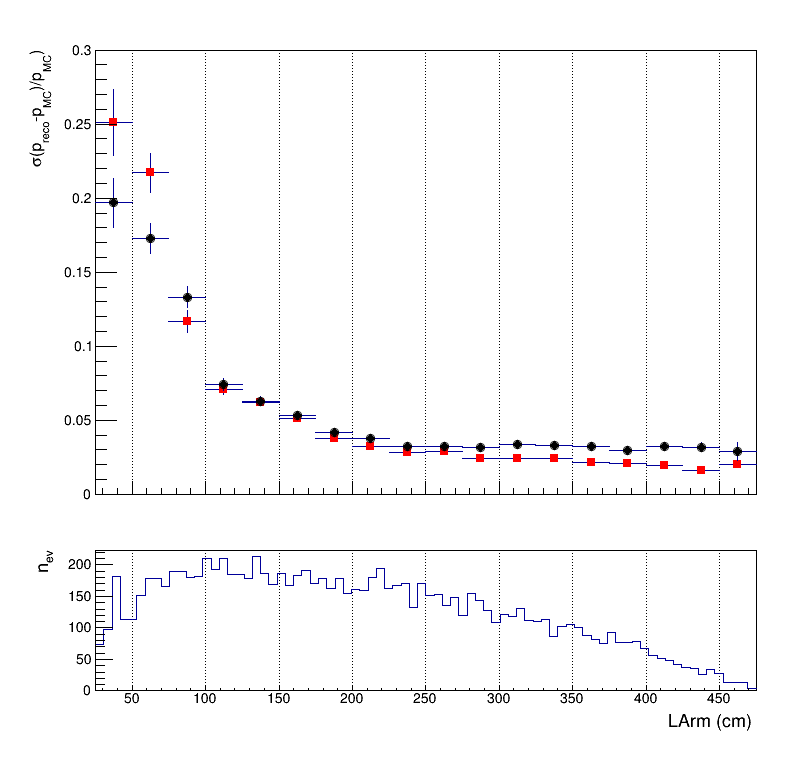

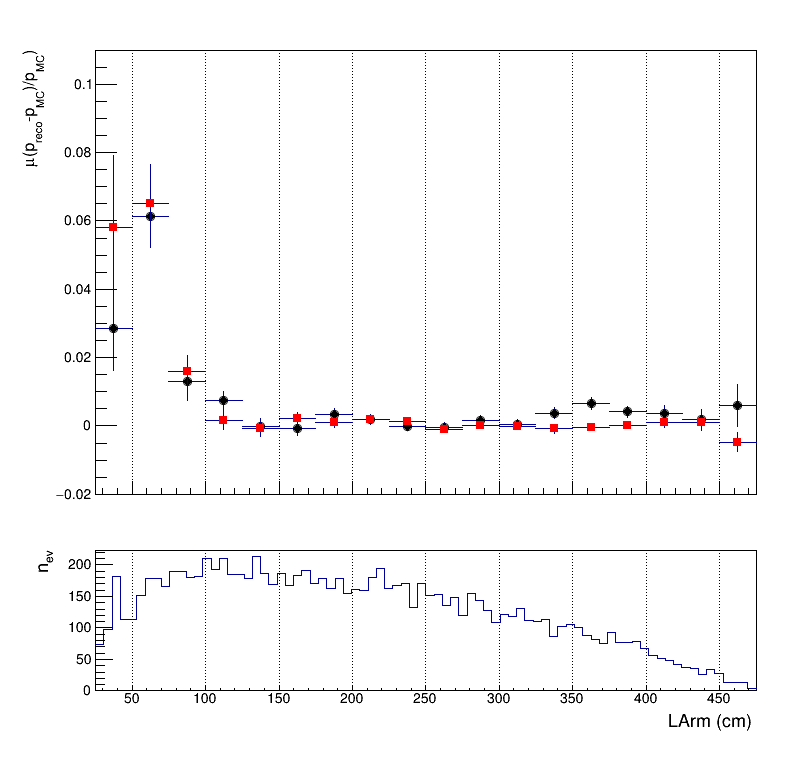

In [4]:
tree.SetAlias("yend","part.fParamMC[fParamMC@.size()-1].fX*sin(part.fParamMC[fParamMC@.size()-1].fAlpha)+part.fParamMC[fParamMC@.size()-1].fP[0]*cos(part.fParamMC[fParamMC@.size()-1].fAlpha)")
tree.SetAlias("ystart","part.fParamMC[0].fX*sin(part.fParamMC[0].fAlpha)+part.fParamMC[0].fP[0]*cos(part.fParamMC[0].fAlpha)")
tree.SetAlias("xend","part.fParamMC[fParamMC@.size()-1].fX*cos(part.fParamMC[fParamMC@.size()-1].fAlpha)-part.fParamMC[fParamMC@.size()-1].fP[0]*sin(part.fParamMC[fParamMC@.size()-1].fAlpha)")
tree.SetAlias("xstart","part.fParamMC[0].fX*cos(part.fParamMC[0].fAlpha)-part.fParamMC[0].fP[0]*sin(part.fParamMC[0].fAlpha)")
tree.SetAlias("lArmMC","sqrt((xend-xstart)*(xend-xstart)+(yend-ystart)*(yend-ystart))")

param = ["paramStNoRot","fParamInRot[0]"]
Var = "lArmMC"
VarName = "LArm (cm)"
legend = ["GArSoft Resolution","NewKF Resolution"]
savesigma = folder+Recotype+"/Plots/"+sample+ParamType+"RespVsLArm.png"
savemean = folder+Recotype+"/Plots/"+sample+ParamType+"BiaspVsLArm.png"
HistoXY = ["10,250,500","30,-0.5,0.5"]
HistoVarX = "80,250,500"
rangeuserYsigma = [0.01,0.04]
rangeuserYmean = [-0.02,0.02]

if(Interaction):
    HistoXY = ["18,25,475","30,-0.5,0.5"]
    HistoVarX = "80,25,475"
    rangeuserYsigma = [0.0,0.3]
    rangeuserYmean = [-0.02,0.11]


Plot_prof_InRot(tree,param[0],param[1],Var,VarName,HistoXY[0],HistoXY[1],HistoVarX,legend[0],legend[1],rangeuserYsigma,rangeuserYmean,savesigma,savemean)

### NPoints

Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,50.000000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (50.000000,100.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (100.000000,150.000000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (150.000000,200.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (200.000000,250.000000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (250.000000,300.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (300.000000,350.000000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (350.000000,400.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (400.000000,450.000000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (450.000000,500.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (500.000000,550.000000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (550.000000,600.000000)
Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the g

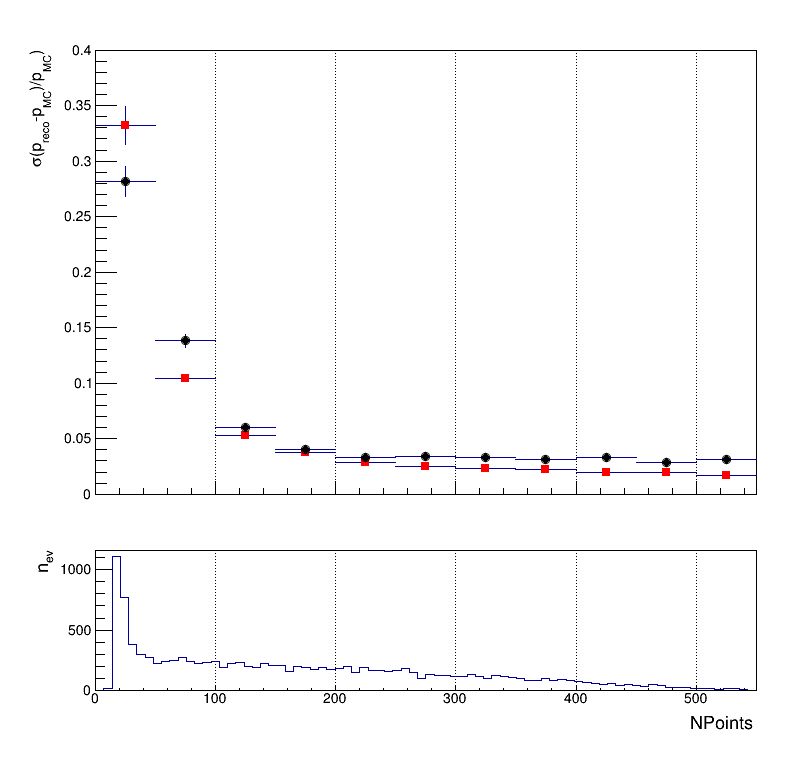

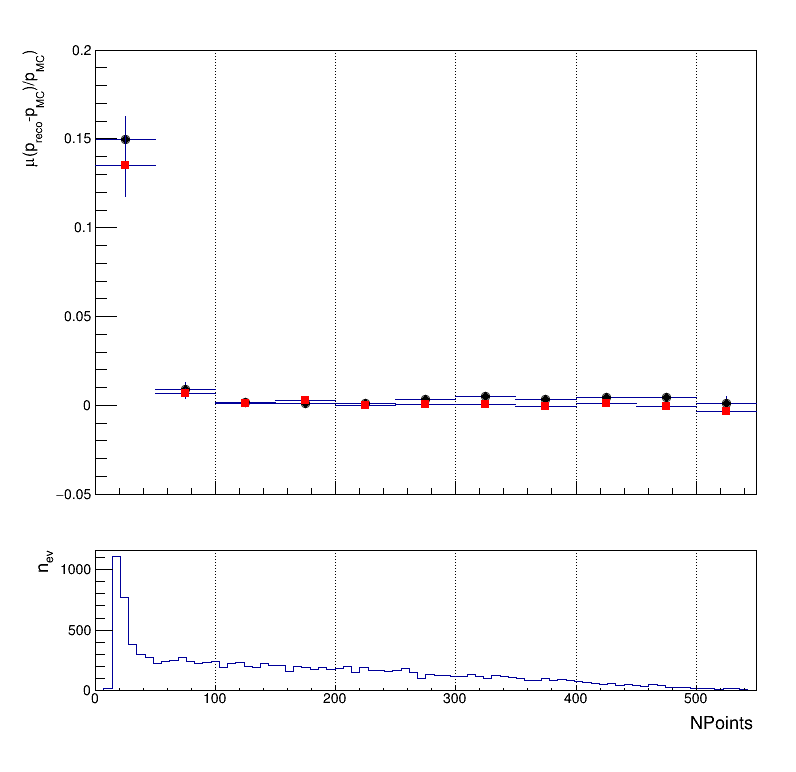

In [5]:
tree.SetAlias("NPoints","part.fParamMC@.size()")

Var = "NPoints"
VarName = "NPoints"
legend = ["GArSoft Resolution","NewKF Resolution"]
savesigma = folder+Recotype+"/Plots/"+sample+ParamType+"RespVsNPoints.png"
savemean = folder+Recotype+"/Plots/"+sample+ParamType+"BiaspVsNPoints.png"
HistoXY = ["9,100,550","30,-0.6,0.6"]
HistoVarX = "80,100,550"
rangeuserYsigma = [0.01,0.06]
rangeuserYmean = [-0.02,0.02]

if(Interaction):
    HistoXY = ["11,0,550","50,-0.6,0.6"]
    HistoVarX = "80,0,550"
    rangeuserYsigma = [0.0,0.4]
    rangeuserYmean = [-0.05,0.2]


Plot_prof_InRot(tree,param[0],param[1],Var,VarName,HistoXY[0],HistoXY[1],HistoVarX,legend[0],legend[1],rangeuserYsigma,rangeuserYmean,savesigma,savemean)

### Total p

Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,0.500000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (0.500000,1.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (1.000000,1.500000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (1.500000,2.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (2.000000,2.500000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (2.500000,3.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (3.000000,3.500000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (3.500000,4.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (4.000000,4.500000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (4.500000,5.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (5.000000,5.500000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (5.500000,6.000000)
Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::Do

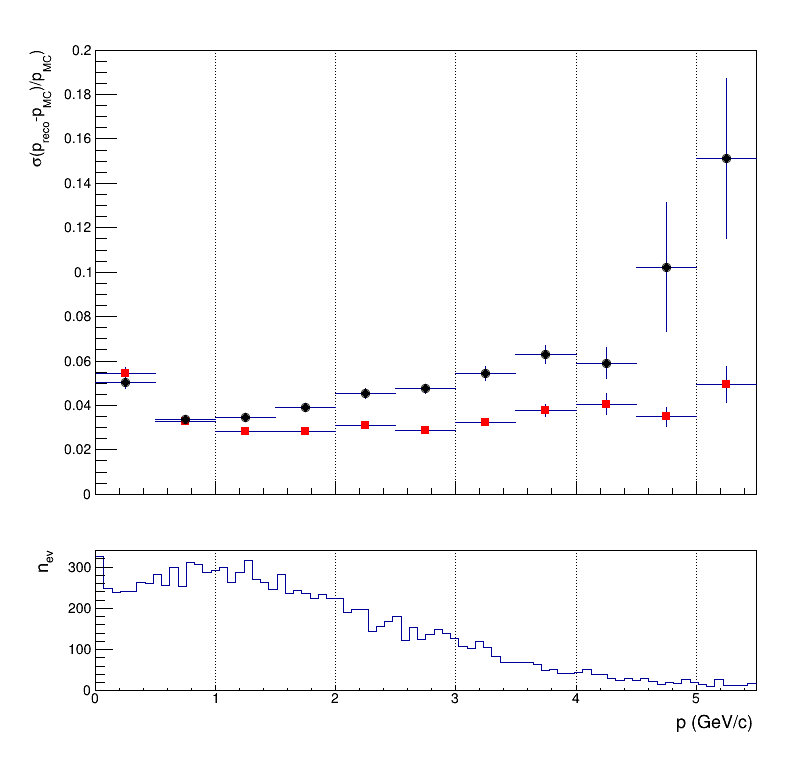

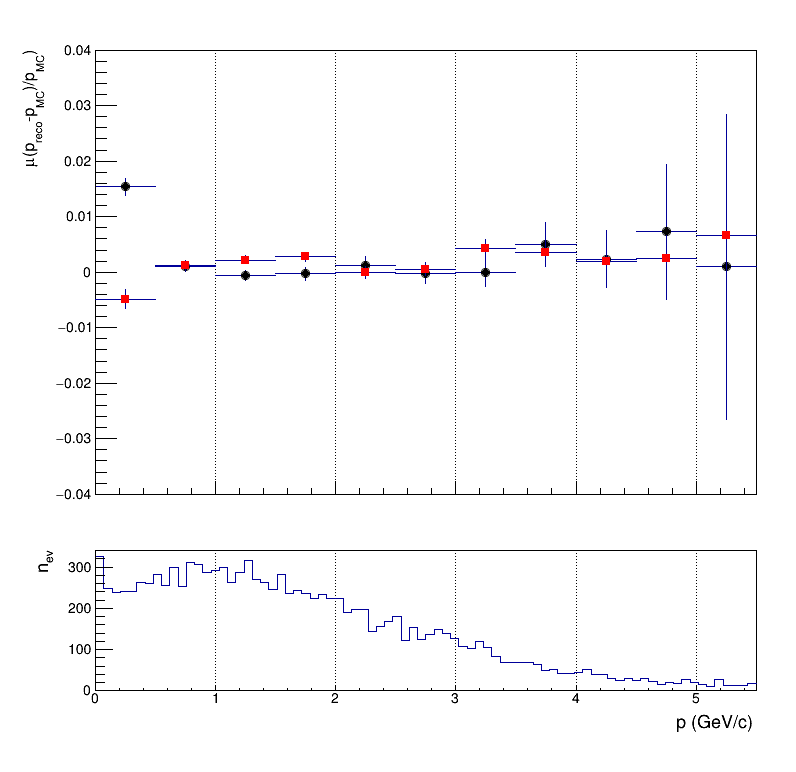

In [11]:
Var = "fParamMC[0].GetP()"
VarName = "p (GeV/c)"
legend = ["GArSoft Resolution","NewKF Resolution"]
savesigma = folder+Recotype+"/Plots/"+sample+ParamType+"RespVstotalp.png"
savemean = folder+Recotype+"/Plots/"+sample+ParamType+"BiaspVsTotalp.png"
HistoXY = ["9,100,550","30,-0.6,0.6"]
HistoVarX = "80,100,550"
rangeuserYsigma = [0.01,0.06]
rangeuserYmean = [-0.02,0.02]

if(Interaction):
    HistoXY = ["11,0,5.5","50,-0.4,0.4"]
    HistoVarX = "80,0,5.5"
    rangeuserYsigma = [0.0,0.2]
    rangeuserYmean = [-0.04,0.04]

Plot_prof_InRot(tree,param[0],param[1],Var,VarName,HistoXY[0],HistoXY[1],HistoVarX,legend[0],legend[1],rangeuserYsigma,rangeuserYmean,savesigma,savemean)

### pT

Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or smaller than the given cut value, n=0.000000
Info in <TH2F::DoFitSlices>: Slice fit 1 (0.000000,0.500000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (0.500000,1.000000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (1.000000,1.500000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (1.500000,2.000000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (2.000000,2.500000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (2.500000,3.000000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (3.000000,3.500000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (3.500000,4.000000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (4.000000,4.500000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (4.500000,5.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (5.000000,5.500000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (5.500000,6.000000)
Info in <TH2F::DoFitSlices>: Slice fit 13 (6.000000,6.500000)
Info in <TH2F::DoFitSlices>: Slice 0 skipped, the number of entries is zero or 

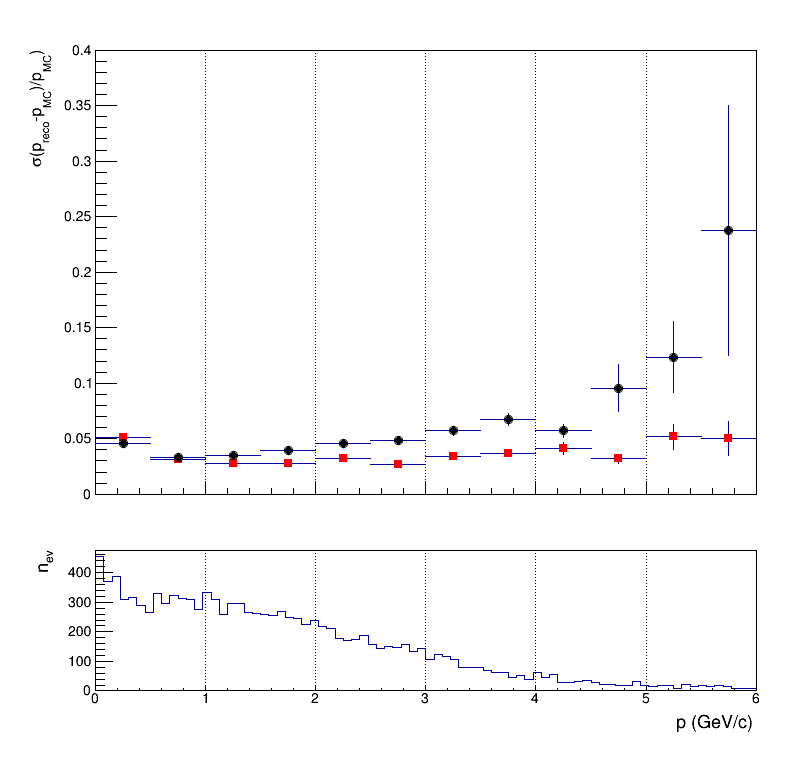

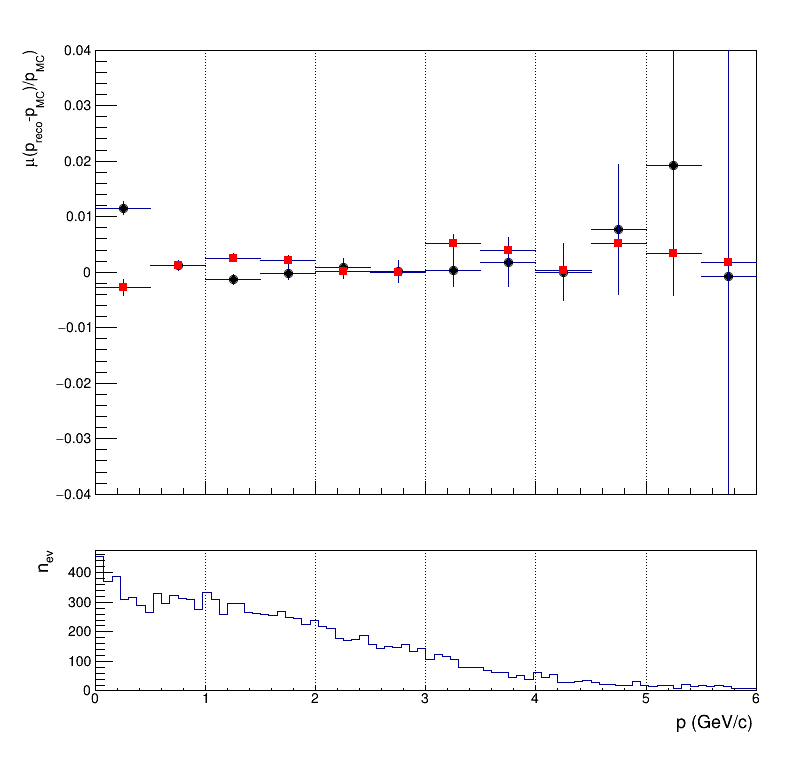

In [12]:
Var = "(1/abs(fParamMC[0].fP[4]))"
VarName = "p (GeV/c)"
legend = ["GArSoft Resolution","NewKF Resolution"]
savesigma = folder+Recotype+"/Plots/"+sample+ParamType+"RespVspT.png"
savemean = folder+Recotype+"/Plots/"+sample+ParamType+"BiaspVspT.png"
HistoXY = ["9,100,550","30,-0.6,0.6"]
HistoVarX = "80,100,550"
rangeuserYsigma = [0.01,0.06]
rangeuserYmean = [-0.02,0.02]

if(Interaction):
    HistoXY = ["12,0,6","50,-0.4,0.4"]
    HistoVarX = "80,0,6"
    rangeuserYsigma = [0.0,0.4]
    rangeuserYmean = [-0.04,0.04]

Plot_prof_InRot(tree,param[0],param[1],Var,VarName,HistoXY[0],HistoXY[1],HistoVarX,legend[0],legend[1],rangeuserYsigma,rangeuserYmean,savesigma,savemean)